In [1]:
import pandas as pd
import pandas_profiling

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#データ読み込み
X_train = pd.read_csv("data_EDA/X_train.csv")
y_train = pd.read_csv("data_EDA/y_train.csv")
X_test = pd.read_csv("data_EDA/X_test.csv")

In [2]:
len(X_test)

len(y_train)
len(X_train)

3000

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,125,74.0,11.164,135.636364,28.536910,0.444902,45
1,4,109,80.0,11.164,135.636364,28.047673,0.238243,22
2,4,88,78.0,39.000,135.636364,52.371341,0.279471,26
3,9,125,74.0,11.164,135.636364,40.062688,0.203922,45
4,5,107,78.0,44.000,284.000000,52.935068,0.284959,45
...,...,...,...,...,...,...,...,...
2995,4,88,74.0,17.000,135.636364,33.848723,0.171073,23
2996,0,144,88.0,11.164,135.636364,26.846832,0.259957,21
2997,6,117,96.0,36.000,135.636364,28.101646,0.716126,22
2998,2,113,74.0,11.164,135.636364,33.079021,0.266179,38


In [3]:
from sklearn.model_selection import StratifiedKFold
seed = 42
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

tr_idx, va_idx = list(kf.split(X_train, y_train))[0]
tr_x, va_x = X_train.iloc[tr_idx], X_train.iloc[va_idx]
tr_y, va_y = y_train.iloc[tr_idx], y_train.iloc[va_idx]

## XGboost
https://qiita.com/c60evaporator/items/a9a049c3469f6b4872c6

In [66]:
from sklearn.model_selection import cross_val_score

In [15]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=1000, random_state=seed)
eval_set = [(va_x, va_y)]


model.fit(
    X_train, y_train,
    eval_set = [(X_train, y_train), (X_valid, y_valid)],
    eval_names = ['train', 'valid'],
    eval_metric = 'auc',
    verbose=100
model.fit(tr_x, tr_y, eval_set=eval_set, verbose=False)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
from sklearn import metrics
pred_y = model.predict_proba(va_x)
metrics.log_loss(va_y, pred_y)

/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.5245495546282546

In [7]:
print(model.best_score)
print(model.best_iteration)

AttributeError: `best_score` in only defined when early stopping is used.

/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


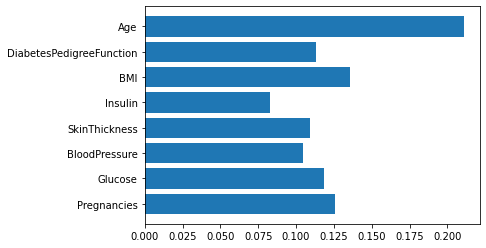

In [10]:
import matplotlib.pyplot as plt
model.feature_importances_
plt.barh(X_test.columns, model.feature_importances_)

pred = model.predict(va_x)

パラメタ調整の場合

In [76]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=seed, n_estimators=10000)

fit_params = {'verbose': 0,  # 学習中のコマンドライン出力
              'early_stopping_rounds': 10,  # 学習時、評価指標がこの回数連続で改善しなくなった時点でストップ
              'eval_metric': 'logloss',  # early_stopping_roundsの評価指標
              'eval_set': [(X_train, y_train)]  # early_stopping_roundsの評価指標算出用データ
              }
scoring = 'neg_log_loss'
scores = cross_val_score(model, X_train, y_train, cv=kf,
                         scoring=scoring, n_jobs=-1, fit_params=fit_params)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python

In [77]:
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

scores=[-0.58192722 -0.55068123 -0.55545767 -0.56509035]
average_score=-0.5632891189373359
